In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
fp_opt = '/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/children_values_std_opt4_4.json'
fp_std = '/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/experiments/target_2/results/children_values_std_4.json'

In [6]:
opt_list = ['Unassigned', 'Heteroaryl N-alkylation', 'Halogenation', 'Reductive amination', 'Alcohol to halide', 'RCO2H deprotections', 'Other reductions', 'O-containing heterocycle formation', 'Other functional group interconversion', 'Stille reaction', 'Ketone to alcohol', 'ROH deprotections', 'O-substitution', 'Friedel-Crafts reaction', 'NH deprotections', 'O-sulfonylation', 'S-substitution', 'N-substitution with alkyl-X', 'Nitro to amine reduction', 'Amide to amine reduction', 'N-arylation with Ar-X', 'Other deprotections', 'Alkene to alkane', 'O-acylation to ester', 'NH protections', 'Dehydration', 'N-acylation to amide']

In [7]:
# load json files to list of reaction dicts
with open(fp_std, 'r') as f_std:
    data_std = json.load(f_std)

with open(fp_opt, 'r') as f_opt:
    data_opt = json.load(f_opt)


In [20]:
print(data_opt[0])

{'template': 'Alkene oxidation', 'metadata': {'q_vals': [0.0004156820650678128, 0.0008465310093015432, 0.0008465310093015432, 0.0008465310093015432, 0.0005398102221079171, 0.0005398102221079171, 0.0005398102221079171, 0.00030102679738774896, 0.00030102679738774896, 0.00030102679738774896, 0.00030102679738774896], 'av_q_value': 0.0005253466317133808, 'visits': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'av_visits': 1.0}, 'count': 11}


In [8]:
all_opt_std = [i for i in data_std if i.get('template') in opt_list]
all_opt_opt = [i for i in data_opt if i.get('template') in opt_list]

In [25]:
def extract_data(d):
    name = d.get('template')
    meta = d.get('metadata')
    q_vals = meta.get('q_vals')
    av_q_val = meta.get('av_q_value')
    count = d.get('count')
    return name, q_vals, av_q_val, count

In [33]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w


def tracking_average(x):
    av = []
    for i in range(len(x)):
        av.append(sum(x[:i])/(i+1))
    return av

Invalid STD:  0
Invalid OPT:  0
Count STD:  325426
Count OPT:  689922


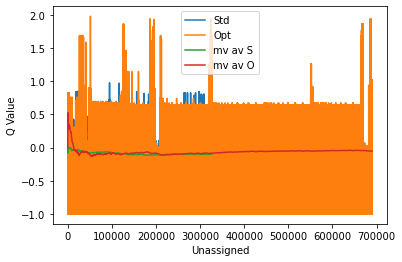

Invalid STD:  0
Invalid OPT:  0
Count STD:  59262
Count OPT:  99704


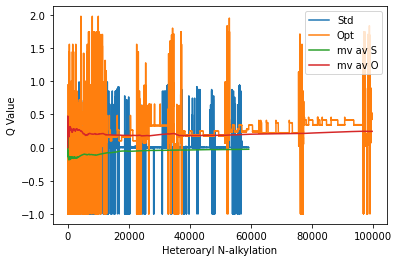

Invalid STD:  0
Invalid OPT:  0
Count STD:  102265
Count OPT:  273230


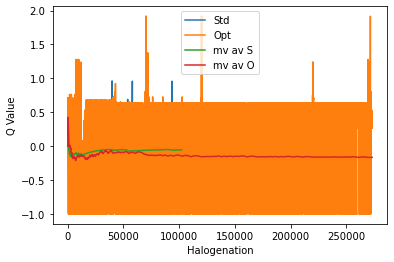

Invalid STD:  0
Invalid OPT:  0
Count STD:  54516
Count OPT:  92343


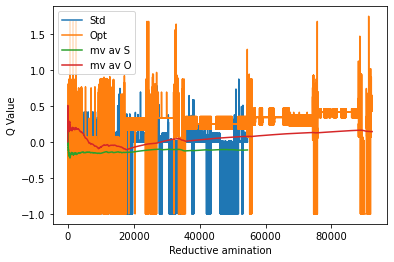

Invalid STD:  0
Invalid OPT:  0
Count STD:  53162
Count OPT:  89335


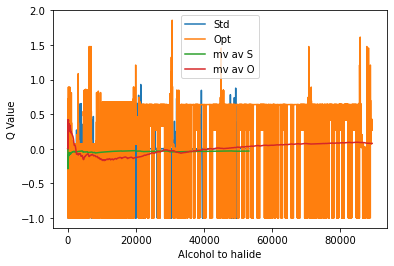

Invalid STD:  0
Invalid OPT:  0
Count STD:  28059
Count OPT:  17493


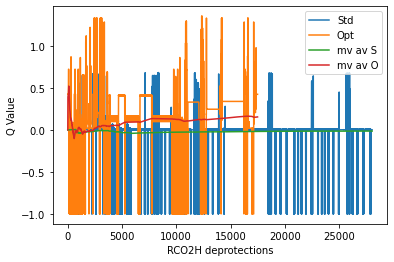

Invalid STD:  0
Invalid OPT:  0
Count STD:  11616
Count OPT:  17796


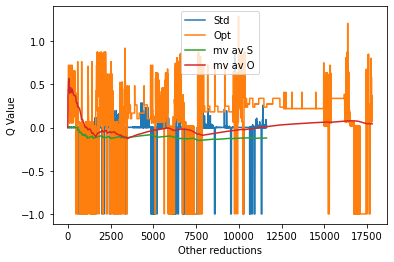

Invalid STD:  0
Invalid OPT:  0
Count STD:  5326
Count OPT:  4144


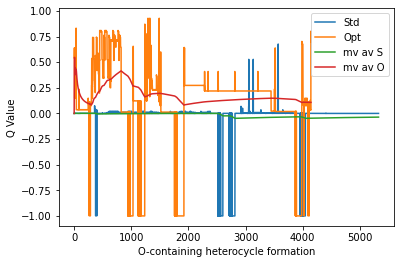

Invalid STD:  0
Invalid OPT:  0
Count STD:  199868
Count OPT:  380723


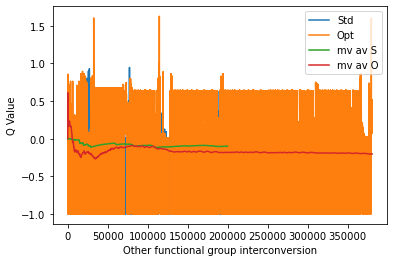

Invalid STD:  0
Invalid OPT:  0
Count STD:  469
Count OPT:  2577


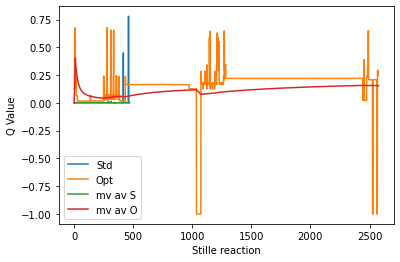

Invalid STD:  0
Invalid OPT:  0
Count STD:  13722
Count OPT:  17699


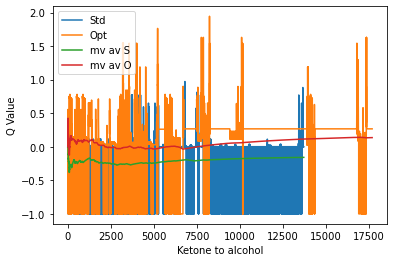

Invalid STD:  0
Invalid OPT:  0
Count STD:  24507
Count OPT:  46246


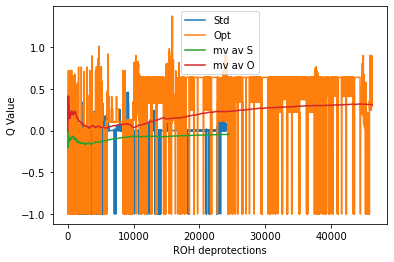

Invalid STD:  0
Invalid OPT:  0
Count STD:  57893
Count OPT:  136347


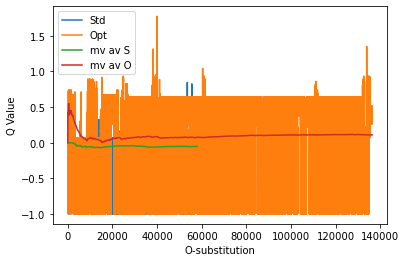

Invalid STD:  0
Invalid OPT:  0
Count STD:  8460
Count OPT:  28727


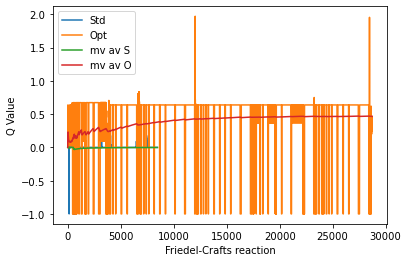

Invalid STD:  0
Invalid OPT:  0
Count STD:  19051
Count OPT:  31909


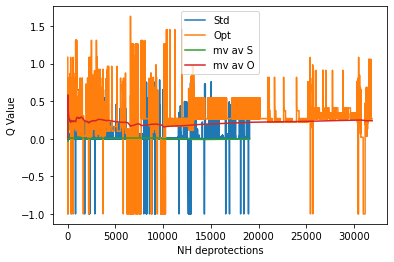

Invalid STD:  0
Invalid OPT:  0
Count STD:  4287
Count OPT:  3017


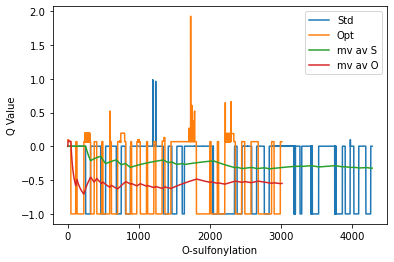

Invalid STD:  0
Invalid OPT:  0
Count STD:  4657
Count OPT:  6491


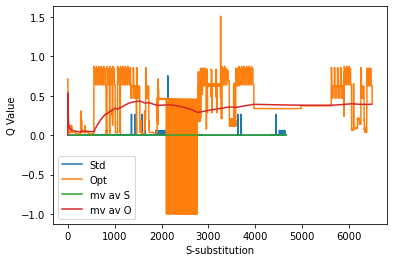

Invalid STD:  0
Invalid OPT:  0
Count STD:  26255
Count OPT:  79844


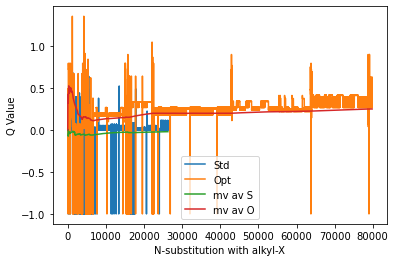

Invalid STD:  0
Invalid OPT:  0
Count STD:  5737
Count OPT:  7403


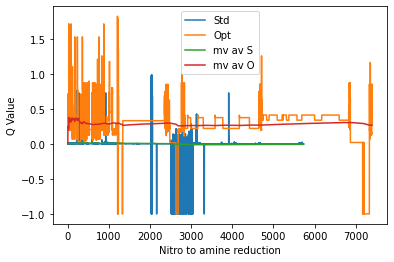

Invalid STD:  0
Invalid OPT:  0
Count STD:  14682
Count OPT:  38054


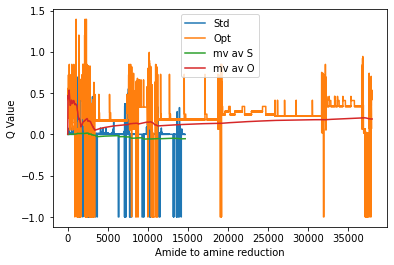

Invalid STD:  0
Invalid OPT:  0
Count STD:  110538
Count OPT:  266086


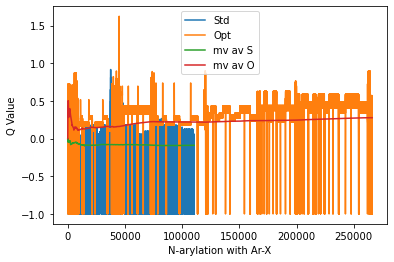

Invalid STD:  0
Invalid OPT:  0
Count STD:  1183
Count OPT:  5819


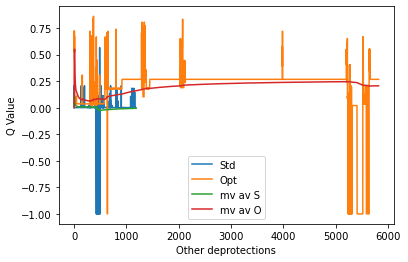

Invalid STD:  0
Invalid OPT:  0
Count STD:  19561
Count OPT:  40979


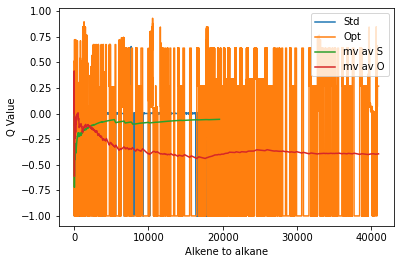

Invalid STD:  0
Invalid OPT:  0
Count STD:  86313
Count OPT:  259750


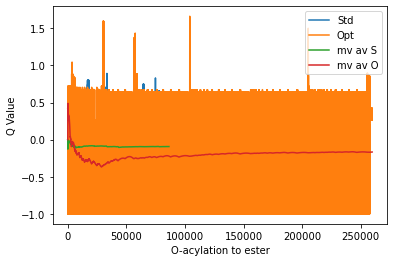

Invalid STD:  0
Invalid OPT:  0
Count STD:  27792
Count OPT:  55663


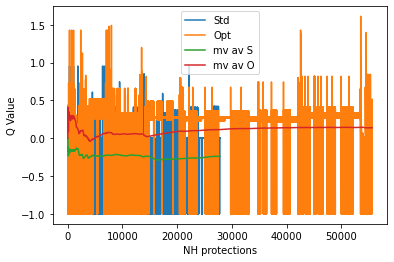

Invalid STD:  0
Invalid OPT:  0
Count STD:  8661
Count OPT:  21714


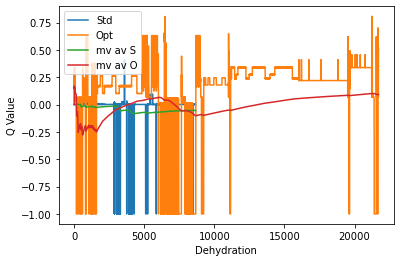

Invalid STD:  0
Invalid OPT:  0
Count STD:  224846
Count OPT:  484752


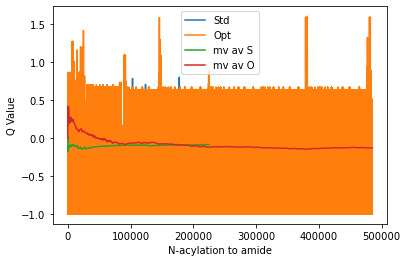

In [35]:
for rxn in opt_list:
    i_std = [i for i in all_opt_std if i.get('template') == rxn][0] 
    i_opt = [i for i in all_opt_opt if i.get('template') == rxn][0] 

    name_s, q_s, av_q_s, c_s = extract_data(i_std)
    name_o, q_o, av_q_o, c_o = extract_data(i_opt)

    

    q_s_2 = [i if i >= 0 else -1 for i in q_s]
    q_o_2 = [i if i >= 0 else -1 for i in q_o]

    ma_s = tracking_average(q_s_2)
    ma_o = tracking_average(q_o_2)

    print('Invalid STD: ', len(q_s) - len(q_s_2))
    print('Invalid OPT: ', len(q_o) - len(q_o_2))
    print('Count STD: ', c_s)
    print('Count OPT: ', c_o)

    plt.plot(q_s_2, label='Std')
    plt.plot(q_o_2, label='Opt')
    plt.plot(ma_s, label='mv av S')
    plt.plot(ma_o, label='mv av O')
    plt.xlabel(rxn)
    plt.ylabel('Q Value')
    plt.legend()
    plt.show()



[0.00027253490407019854, 0.00027253490407019854, 0.00027253490407019854, 0.0003776823577936739, 0.0004260412242729217, 0.0004260412242729217, 0.0004260412242729217, 0.0004260412242729217, 0.0004260412242729217, 0.0018105386989191175, 0.0018105386989191175, 0.0018105386989191175, 0.0018105386989191175, 0.0018105386989191175, 0.0018105386989191175, 0.0018105386989191175, 0.0018105386989191175, 0.0018105386989191175, 0.0003776823577936739, 0.0004260412242729217, 0.0004260412242729217, 0.0004260412242729217, 0.000689393375068903, 0.0005258942837826908, 0.0008539622649550438, 0.00038086657878011465, 0.00029486799030564725, 0.00027253490407019854, 0.00027253490407019854, 0.00027253490407019854, 0.00027253490407019854, 0.000689393375068903, 0.0005258942837826908, 0.0008539622649550438, 0.00038086657878011465, 0.00029486799030564725, 0.00027253490407019854, 0.0004148885200265795, 0.0004148885200265795, 0.0004148885200265795, 0.0006977267330512404, 0.0006977267330512404, 0.0006977267330512404, 

<function matplotlib.pyplot.show(close=None, block=None)>

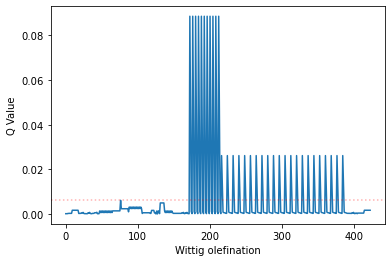

In [36]:
# print graph from data in dictionary
name, q, av_q = extract_data(data_std[5])

print(q)

plt.plot(q)
plt.xlabel(str(name))
plt.ylabel('Q Value')
plt.axhline(y=av_q, alpha=0.3, c='red', linestyle='dotted')
plt.show

In [4]:
# convert data to list of list
def convert_to_df(d):
    q_values = [] 
    visits = []
    counts = []
    names = []
    for i in d:
        name = i.get('template')
        meta = i.get('metadata')
        q = meta.get('q_value')
        v = meta.get('visits')
        c = i.get('count')
        q_values.append(q)
        visits.append(v)
        counts.append(c) 
        names.append(name)
    
    data = {
        'Template': names,
        'Q value': q_values,
        'Visits': visits,
        'Count': counts
    }

    
    return pd.DataFrame(data)

In [5]:
df_std = convert_to_df(data_std)
df_opt = convert_to_df(data_opt)

In [6]:
opt_list = ['Unassigned', 'Heteroaryl N-alkylation', 'Halogenation', 'Reductive amination', 'Alcohol to halide', 'RCO2H deprotections', 'Other reductions', 'O-containing heterocycle formation', 'Other functional group interconversion', 'Stille reaction', 'Ketone to alcohol', 'ROH deprotections', 'O-substitution', 'Friedel-Crafts reaction', 'NH deprotections', 'O-sulfonylation', 'S-substitution', 'N-substitution with alkyl-X', 'Nitro to amine reduction', 'Amide to amine reduction', 'N-arylation with Ar-X', 'Other deprotections', 'Alkene to alkane', 'O-acylation to ester', 'NH protections', 'Dehydration', 'N-acylation to amide']

In [7]:
# Determine the difference between optimised reactions
opt_qchange_dict = {}

for i in opt_list:
    std = df_std.loc[df_std['Template'] == i]
    opt = df_opt.loc[df_opt['Template'] == i]

    print('Template: ', i)
    print('STD: ', std.iloc[0]['Q value']/std.iloc[0]['Visits'])
    print('OPT: ', opt.iloc[0]['Q value']/opt.iloc[0]['Visits'])
    print('STD Count: ', std.iloc[0]['Count'])
    print('OPT Count: ', opt.iloc[0]['Count'])
    print(('\n'))

    opt_qchange_dict[i] = [(opt.iloc[0]['Q value']/opt.iloc[0]['Visits'] - std.iloc[0]['Q value']/std.iloc[0]['Visits']), (opt.iloc[0]['Count'] - std.iloc[0]['Count'])]




Template:  Unassigned
STD:  0.8411998481847167
OPT:  0.7056885661452753
STD Count:  5531967
OPT Count:  6639221


Template:  Heteroaryl N-alkylation
STD:  -0.36971696530512466
OPT:  -0.24842227591789748
STD Count:  1049982
OPT Count:  1195584


Template:  Halogenation
STD:  0.32371819027935805
OPT:  -0.032980470894509104
STD Count:  1484787
OPT Count:  2315725


Template:  Reductive amination
STD:  -0.9448599881499337
OPT:  -1.1196326814994446
STD Count:  885855
OPT Count:  994692


Template:  Alcohol to halide
STD:  -0.06331753527189346
OPT:  -1.5688655764173014
STD Count:  770852
OPT Count:  900495


Template:  RCO2H deprotections
STD:  -0.013146614831777849
OPT:  -3.202299279589436
STD Count:  414787
OPT Count:  230637


Template:  Other reductions
STD:  -3.050014784975133
OPT:  -4.9977804333045714
STD Count:  251718
OPT Count:  250257


Template:  O-containing heterocycle formation
STD:  -1.946277191094326
OPT:  -2.5962964945676394
STD Count:  91258
OPT Count:  55830


Template:  O

In [8]:
print(opt_qchange_dict)

for key in opt_o_temps:
    opt_qchange_dict[key] = opt_qchange_dict.pop(key)

print(opt_qchange_dict)

{'Unassigned': [-0.1355112820394414, 1107254], 'Heteroaryl N-alkylation': [0.12129468938722718, 145602], 'Halogenation': [-0.35669866117386717, 830938], 'Reductive amination': [-0.17477269334951095, 108837], 'Alcohol to halide': [-1.5055480411454079, 129643], 'RCO2H deprotections': [-3.1891526647576582, -184150], 'Other reductions': [-1.9477656483294385, -1461], 'O-containing heterocycle formation': [-0.6500193034733135, -35428], 'Other functional group interconversion': [-0.35730803572970354, 613999], 'Stille reaction': [4.84339747876637, 9980], 'Ketone to alcohol': [1.8824798952983972, 13188], 'ROH deprotections': [0.5429177031803427, 88671], 'O-substitution': [-0.04218892263482682, 451284], 'Friedel-Crafts reaction': [-3.2920020143314495, 118256], 'NH deprotections': [0.11724400063156251, 8113], 'O-sulfonylation': [-50.10963077364827, -21803], 'S-substitution': [-1.2806598946660452, 20600], 'N-substitution with alkyl-X': [0.8854586051083643, 244961], 'Nitro to amine reduction': [-0.

NameError: name 'opt_o_temps' is not defined

<function matplotlib.pyplot.show(close=None, block=None)>

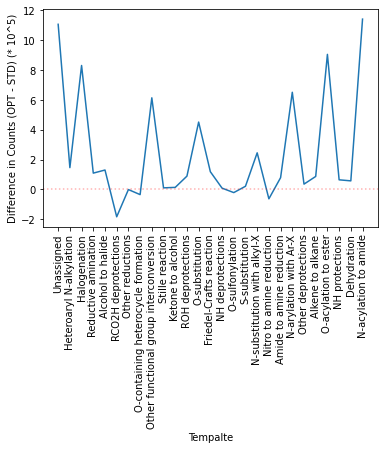

In [12]:
import matplotlib.pyplot as plt

temps = list(opt_qchange_dict.keys())
dc = list(opt_qchange_dict.values())
counts = [i[1]/100000 for i in dc]
diffs = [i[0] for i in dc]

plt.plot(temps, counts)
plt.xticks(rotation=90)
plt.xlabel('Tempalte')
plt.ylabel('Difference in Counts (OPT - STD) (* 10^5)')
plt.axhline(y=0, alpha=0.3, c='red', linestyle='dotted')
#plt.savefig('/data/localhost/not-backed-up/mokaya/exscientia/aizynthfinder/Maranga/Images/count_diff.png')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

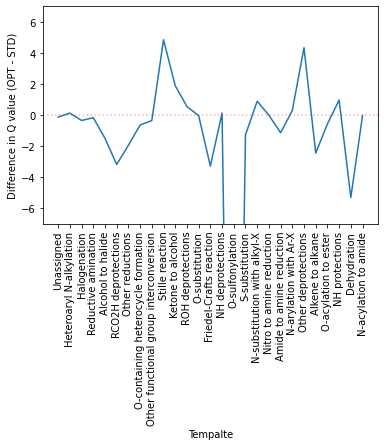

In [17]:
temps = list(opt_qchange_dict.keys())
dc = list(opt_qchange_dict.values())
counts = [i[1]/100000 for i in dc]
diffs = [i[0] for i in dc]

plt.plot(temps, diffs)
plt.xticks(rotation=90)
plt.xlabel('Tempalte')
plt.ylabel('Difference in Q value (OPT - STD)')
plt.axhline(y=0, alpha=0.3, c='red', linestyle='dotted')
plt.ylim(-7,7)
plt.show

In [11]:
o_temps=['Unassigned', 'Heteroaryl N-alkylation', 'Reductive amination', 'RCO2H deprotections', 'Halogenation', 'O-acylation to ester', 'Other functional group interconversion', 'Other reductions', 'Alcohol to halide', 'ROH deprotections', 'O-substitution', 'NH deprotections', 'N-arylation with Ar-X', 'Amide to amine reduction', 'O-sulfonylation', 'Friedel-Crafts reaction', 'N-acylation to amide', 'Alkene to alkane', 'Acid to acid chloride', 'S-substitution', 'N-substitution with alkyl-X', 'NH protections', 'Other deprotections', 'Ketone to alcohol', 'O-containing heterocycle formation', 'Nitro to amine reduction', 'Alcohols to aldehydes']
opt_o_temps = [i for i in o_temps if i in opt_list]